In [1]:
from moredata.datasets import get_path
import pandas as pd

df = pd.read_csv(get_path("airbnb-berlin-main"))
df = df.loc[(~df['latitude'].isna()) & (~df['longitude'].isna())]

/home/gegen07/anaconda3/envs/moredata-dev/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.2-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


## Geopandas

In [4]:
from moredata.datasets import get_path
import pandas as pd
import json
from moredata import Enricher, FunctionalRegionConnector, EnricherBuilder
from moredata.models.data import GeopandasData
import geopandas


gdf = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.longitude, df.latitude))

gdf = GeopandasData.from_geodataframe(gdf)

region_artwork_enricher = Enricher(connector=FunctionalRegionConnector(files=['./data/places/artwork.csv.gz'], key='artwork', radius=50))
region_attraction_enricher = Enricher(connector=FunctionalRegionConnector(files=['./data/places/attraction.csv.gz'], key='attraction', radius=50))
region_hotel_enricher = Enricher(connector=FunctionalRegionConnector(files=['./data/places/hotel.csv.gz'], key='hotel', radius=50))
region_information_enricher = Enricher(connector=FunctionalRegionConnector(files=['./data/places/information.csv.gz'], key='information', radius=50))
region_museum_enricher = Enricher(connector=FunctionalRegionConnector(files=['./data/places/museum.csv.gz'], key='museum', radius=50))


gdf_enriched = EnricherBuilder(gdf)\
                .with_enrichment(region_artwork_enricher)\
                .with_enrichment(region_attraction_enricher)\
                .with_enrichment(region_hotel_enricher)\
                .with_enrichment(region_information_enricher)\
                .with_enrichment(region_museum_enricher)
gdf_enriched = gdf_enriched.get_result()

/home/gegen07/dev/open-source/more-data/moredata/enricher/osm/functional_region_connector.py:51: DtypeWarning: Columns (14,19,30,35,42,46,51,52,54,55,77,80,94,95,96,98,99,100,101,102,103,116,117,118,126,131,132,137,141,145,152,158,159,175,176,180,185,192,197,198,205,210,211,212,215,216,217,218,219,220,221,223,228,229,230,233,246,248,251,254,255,258,261,263,264,265,270,283,285,323,324,325,326,333,334,335,340,341,345,354,361,369,372,373,378,390,393,394,396,425,475,487,488) have mixed types. Specify dtype option on import or set low_memory=False.
  read_temp.append(pd.read_csv(file))
/home/gegen07/dev/open-source/more-data/moredata/enricher/osm/functional_region_connector.py:51: DtypeWarning: Columns (7,8,9,20,26,30,34,42,43,46,50,51,55,56,57,65,93,98,107,108,109,110,112,113,114,115,116,125,133,135,136,142,146,154,159,166,168,172,173,176,179,181,182,183,185,194,196,207,216,223,228,229,231,241,242,243,244,245,249,258,300,301,312,315,317,322,328,329,330,337,339,341,343,344,346,347,352,353,3

In [5]:
gdf_enriched = gdf_enriched
gdf_enriched.describe()

,latitude,longitude,artwork,attraction,hotel,information,museum
count,19858.000000,19858.000000,19858.000000,19858.000000,19858.000000,19858.000000,19858.000000
mean,52.507632,13.403739,0.012589,0.008712,0.028754,0.015057,0.005539
std,0.366925,0.107804,0.140656,0.098202,0.180170,0.134365,0.081961
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.489850,13.367815,0.000000,0.000000,0.000000,0.000000,0.000000
50%,52.509910,13.413860,0.000000,0.000000,0.000000,0.000000,0.000000
75%,52.533090,13.438897,0.000000,0.000000,0.000000,0.000000,0.000000
max,52.655980,13.757580,6.000000,3.000000,3.000000,3.000000,2.000000


/tmp/ipykernel_157237/2386674346.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['price'] = plot_df['price'].apply(lambda x: float(x.replace('$', '').replace(',', '')))


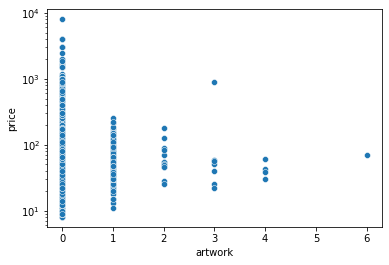

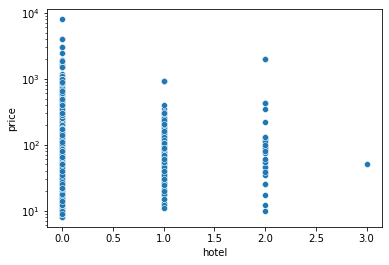

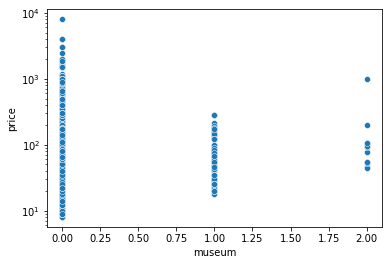

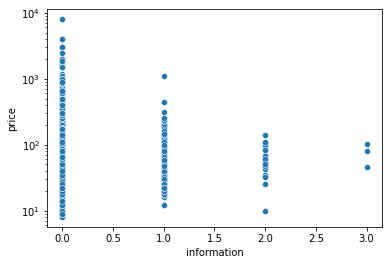

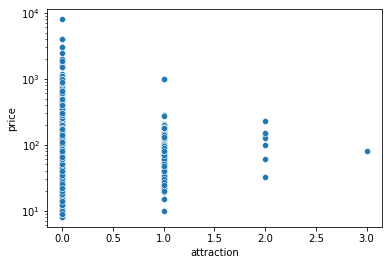

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

names = ['artwork', 'hotel', 'museum', 'information', 'attraction']
plot_df = gdf_enriched[['price', 'artwork', 'hotel', 'museum', 'information', 'attraction']]
plot_df['price'] = plot_df['price'].apply(lambda x: float(x.replace('$', '').replace(',', '')))
for n in names:
    sns.scatterplot(x=n, y='price', data=plot_df)
    plt.yscale('log')
    plt.show()